In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Image Features

In [94]:
from cape_core.tensordata import *
from cape_core.models import *
from cape_core.utils import *
from cape_core.data import *
from cape_core.ranger import *
from fastai.callbacks import SaveModelCallback

In [95]:
PATH = Path.cwd()
PATH.ls()

[PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/feat_xr34_512_zoom20_256'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/zoom15'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/tabular_feature_sample-Copy1.ipynb'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/labels_sample'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/feat_xr34_512_zoom15_256'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/train_classifier.py'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/tabular_sample_baseline.ipynb'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/tabular_feature_sample.ipynb'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/.ipynb_checkpoints'),
 PosixPath('/home/tc256760/Documents/Tabular_image_model/Sample Models/classifier_sample-refactor.ipynb'),
 PosixPath('/home/tc256

# Importing DataFrames

In [96]:
data = get_data(PATH); data.head()

,index,p_ab_rs_band,p_90_rs_band,dont_use_rs,p_ab_cs_band,p_90_cs_band,dont_use_cs,p_ab_3party_band,p_90_3party_band,dont_use_3party,...,cad_id,prop_id,asatdate,prop_titledeedtype,estate_id,sgr_id,suburb_id,trf_purchprice,prop_munvalinfl,train
23072,220570,8,10,0,4,7,0,0,0,1,...,6905651,11944540,2017-04-15,FH,0.0,0,9834.0,1550000.0,0.0,True
54670,190005,8,9,0,6,8,0,0,0,1,...,4669236,11360646,2017-09-11,FH,0.0,0,3496.0,900000.0,0.0,True
8194,193975,8,8,0,7,10,0,0,0,1,...,1057686,11435648,2017-02-08,FH,0.0,0,48.0,1995000.0,0.0,True
67378,446903,9,10,0,7,8,0,0,0,1,...,5487873,15736748,2017-11-07,FH,0.0,0,5545.0,900000.0,0.0,True
62748,48275,8,8,0,6,8,0,0,0,1,...,168364,9485339,2017-10-17,FH,0.0,0,4339.0,1230000.0,939320.0,True


## Sectional 

In [97]:
data = data[data.sgr_id>0]

In [98]:
# zooms = ['zoom15_256']
# zooms = ['zoom18_256']
# zooms = ['512_zoom20_256']

zooms = ['512_zoom20_256','512_zoom18_256', '512_zoom15_256']


read all features DataFrames and put them on a list

In [99]:
df_list = [pd.read_pickle(f'feat_xr34_{zoom}').set_index('cad_id') for zoom in zooms]
feature_len = get_features_len(df_list[0].shape[1]); feature_len

512

In [100]:
df_list[0].head()

,img_feat_0,img_feat_1,img_feat_2,img_feat_3,img_feat_4,img_feat_5,img_feat_6,img_feat_7,img_feat_8,img_feat_9,...,img_feat_502,img_feat_503,img_feat_504,img_feat_505,img_feat_506,img_feat_507,img_feat_508,img_feat_509,img_feat_510,img_feat_511
cad_id,,,,,,,,,,,,,,,,,,,,,
6905651,0.001901,0.002313,0.001925,0.001879,0.002021,0.002060,0.001974,0.001899,0.001903,0.001962,...,0.001842,0.001861,0.001839,0.001835,0.001906,0.002033,0.002133,0.002022,0.001816,0.002023
4669236,0.001920,0.001929,0.001853,0.001910,0.001936,0.001910,0.001987,0.001880,0.001868,0.001955,...,0.002043,0.001905,0.001919,0.001877,0.002092,0.001969,0.001947,0.001923,0.001913,0.002003
1057686,0.001940,0.002048,0.001887,0.001839,0.001859,0.001857,0.001838,0.002063,0.002000,0.001744,...,0.001916,0.001992,0.001907,0.001758,0.001846,0.002151,0.001788,0.001822,0.001896,0.002234
5487873,0.001948,0.002045,0.001929,0.001868,0.001986,0.001939,0.001892,0.001911,0.001846,0.001861,...,0.001883,0.001946,0.001894,0.001859,0.001909,0.002114,0.001900,0.001947,0.001834,0.002085
168364,0.001907,0.002008,0.001840,0.001897,0.001934,0.001881,0.001999,0.001865,0.001902,0.001863,...,0.002018,0.001915,0.001865,0.001881,0.002025,0.001957,0.001981,0.001904,0.001881,0.001973


Concat the lists together

In [101]:
img_features = pd.concat([df.iloc[slice(None), -feature_len:] for df in df_list],
                         keys=zooms, 
                         axis=1)

In [102]:
img_features.head()

512_zoom20_256                                                         \
           img_feat_0 img_feat_1 img_feat_2 img_feat_3 img_feat_4 img_feat_5   
cad_id                                                                         
29           0.001827   0.002214   0.001785   0.002183   0.002092   0.002077   
76           0.001870   0.002051   0.001905   0.001857   0.001892   0.001953   
78           0.001865   0.002097   0.001812   0.001843   0.001964   0.001894   
148          0.001858   0.001989   0.001867   0.001873   0.001863   0.001851   
166          0.001953   0.002250   0.001842   0.001985   0.001998   0.001914   

                                                    ... 512_zoom15_256  \
       img_feat_6 img_feat_7 img_feat_8 img_feat_9  ...   img_feat_502   
cad_id                                              ...                  
29       0.002237   0.001785   0.002027   0.002194  ...       0.002362   
76       0.001856   0.001947   0.001832   0.001817  ...       0.001864   
78       0.002033   0.001875   0.001952   0.001829  ...       0.001877   
148      0.002022   0.001851   0.001953   0.001941  ...       0.002549   
166      0.002026   0.001863   0.002004   0.002048  ...       0.002320   

                                                                         \
       img_feat_503 img_feat_504 img_feat_505 img_feat_506 img_feat_507   
cad_id                                                                    
29         0.002024     0.001874     0.002249     0.002510     0.002125   
76         0.001713     0.001922     0.002060     0.001931     0.002088   
78         0.001688     0.001879     0.001952     0.001945     0.001842   
148        0.001746     0.002436     0.001830     0.002506     0.002253   
166        0.001757     0.001974     0.001867     0.002438     0.001869   

                                                            
       img_feat_508 img_feat_509 img_feat_510 img_feat_511  
cad_id                                                      
29         0.001666     0.001673     0.001576     0.001693  
76         0.001788     0.001919     0.001848     0.001667  
78         0.001742     0.002039     0.001757     0.001667  
148        0.001823     0.001699     0.001660     0.001682  
166        0.001831     0.001705     0.001614     0.001638  

[5 rows x 1536 columns]

In [103]:
img_features_flat = pd.DataFrame(data=img_features.values, index=img_features.index); img_features_flat.head()

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
cad_id,,,,,,,,,,,,,,,,,,,,,
29,0.001827,0.002214,0.001785,0.002183,0.002092,0.002077,0.002237,0.001785,0.002027,0.002194,...,0.002362,0.002024,0.001874,0.002249,0.002510,0.002125,0.001666,0.001673,0.001576,0.001693
76,0.001870,0.002051,0.001905,0.001857,0.001892,0.001953,0.001856,0.001947,0.001832,0.001817,...,0.001864,0.001713,0.001922,0.002060,0.001931,0.002088,0.001788,0.001919,0.001848,0.001667
78,0.001865,0.002097,0.001812,0.001843,0.001964,0.001894,0.002033,0.001875,0.001952,0.001829,...,0.001877,0.001688,0.001879,0.001952,0.001945,0.001842,0.001742,0.002039,0.001757,0.001667
148,0.001858,0.001989,0.001867,0.001873,0.001863,0.001851,0.002022,0.001851,0.001953,0.001941,...,0.002549,0.001746,0.002436,0.001830,0.002506,0.002253,0.001823,0.001699,0.001660,0.001682
166,0.001953,0.002250,0.001842,0.001985,0.001998,0.001914,0.002026,0.001863,0.002004,0.002048,...,0.002320,0.001757,0.001974,0.001867,0.002438,0.001869,0.001831,0.001705,0.001614,0.001638


In [104]:
data = data.merge(img_features_flat.reset_index(), on='cad_id'); data.shape

(4673, 1599)

In [105]:
data.head()

,index,p_ab_rs_band,p_90_rs_band,dont_use_rs,p_ab_cs_band,p_90_cs_band,dont_use_cs,p_ab_3party_band,p_90_3party_band,dont_use_3party,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,75623,6,4,0,8,6,0,7,9,0,...,0.001789,0.001708,0.002014,0.001843,0.001879,0.001681,0.001688,0.001902,0.001781,0.001640
1,368477,0,0,0,8,5,0,0,0,1,...,0.001786,0.001686,0.003307,0.001836,0.001684,0.001662,0.001619,0.001842,0.001752,0.001690
2,78701,9,9,0,8,9,0,0,0,1,...,0.002040,0.001964,0.001878,0.002069,0.001870,0.001658,0.001760,0.002139,0.001770,0.001876
3,657039,0,0,0,0,0,0,0,0,0,...,0.001619,0.001587,0.002152,0.002244,0.001639,0.001658,0.001868,0.002240,0.001740,0.001580
4,518764,9,9,0,9,8,0,0,0,1,...,0.002057,0.001766,0.001954,0.002110,0.001915,0.001704,0.001718,0.001863,0.001773,0.001729


In [106]:
data.dropna(inplace=True)
data = data.reset_index(); data.shape

(4501, 1600)

In [107]:
train_idxs = data[data['train']].index
val_idxs = data[~data['train']].index

In [108]:
dep_var='trf_purchprice'
max_log_y = np.log(np.max(data[dep_var])*1.2)
y_range = torch.tensor([12, max_log_y], device=defaults.device); y_range

tensor([12.0000, 15.6073], device='cuda:0')

In [109]:
features = data.iloc[slice(None), -len(zooms)*feature_len:].values; features[0:3]

array([[0.001915, 0.001924, 0.001943, 0.001773, ..., 0.001688, 0.001902, 0.001781, 0.00164 ],
       [0.001927, 0.00189 , 0.001826, 0.001923, ..., 0.001619, 0.001842, 0.001752, 0.00169 ],
       [0.001859, 0.001897, 0.001943, 0.001801, ..., 0.00176 , 0.002139, 0.00177 , 0.001876]], dtype=float32)

In [110]:
X_train = features[train_idxs]
y_train = np.log(data.loc[train_idxs, dep_var].values)
X_valid = features[val_idxs]
y_valid = np.log(data.loc[val_idxs, dep_var].values)

tl = tensor_lists_from_arrays(X_train, y_train, X_valid, y_valid)

In [111]:
db = tl.databunch(no_check=True, bs=128)

In [112]:
x,y = db.one_batch()

In [113]:
x.shape

torch.Size([128, 1, 1536])

# Train

In [114]:
arch = nn.Sequential(Flatten(), 
                     *bn_drop_lin(x.shape[-1] , 512, actn=nn.ReLU(), p=0.5),
                     *bn_drop_lin(512, 512, actn=nn.ReLU(), p=0.3),
                     *bn_drop_lin(512, 1), 
                     SigmoidRange(*y_range)
                    )

In [115]:
arch

Sequential(
  (0): Flatten()
  (1): BatchNorm1d(1536, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=1536, out_features=512, bias=True)
  (4): ReLU()
  (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Dropout(p=0.3, inplace=False)
  (7): Linear(in_features=512, out_features=512, bias=True)
  (8): ReLU()
  (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Linear(in_features=512, out_features=1, bias=True)
  (11): SigmoidRange()
)

In [116]:
learn = Learner(db, 
                arch, 
                loss_func=L1Flat(),
                metrics=[exp_rmspe, exp_rmse, r2_score]).to_fp16(clip=1)

In [117]:
learn.loss_func

FlattenedLoss of L1Loss()

In [118]:
# learn.lr_find(); learn.recorder.plot()

In [119]:
learn.fit_one_cycle(12, 5e-3,
             callbacks=[SaveModelCallback(learn, monitor='exp_rmspe', mode='min', name='best_feature_baseline')])

epoch,train_loss,valid_loss,exp_rmspe,exp_rmse,r2_score,time
0,0.455622,0.506477,0.504997,786861.625000,-0.264057,00:02
1,0.416662,0.419532,0.707990,650680.812500,0.065672,00:02
2,0.367653,0.384207,0.613042,618534.875000,0.214781,00:02
3,0.347817,0.357442,0.534521,618016.937500,0.253128,00:02
4,0.327785,0.302544,0.433441,499320.375000,0.472566,00:02
5,0.318848,0.358774,0.851622,623297.875000,0.212066,00:02
6,0.306884,0.305836,0.551731,526700.000000,0.446752,00:02
7,0.296486,0.309860,0.476067,563213.062500,0.462946,00:02
8,0.285337,0.285973,0.447705,495376.968750,0.542933,00:02
9,0.277172,0.284815,0.426253,527440.750000,0.535620,00:02


Better model found at epoch 0 with exp_rmspe value: 0.5049968361854553.
Better model found at epoch 4 with exp_rmspe value: 0.43344131112098694.
Better model found at epoch 9 with exp_rmspe value: 0.4262533187866211.
Better model found at epoch 10 with exp_rmspe value: 0.40083107352256775.


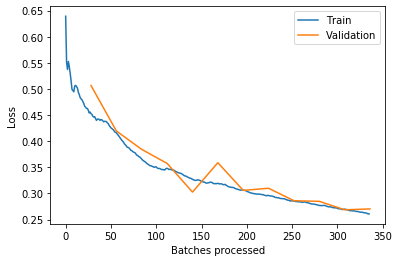

In [120]:
learn.recorder.plot_losses()

In [121]:
learn.load('best_feature_baseline');

In [122]:
p, t = learn.get_preds(DatasetType.Valid)

In [123]:
exp_rmspe(p,t)

tensor(0.4028)

In [125]:
print_stats(p,t)


RMSE (log y): 0.34854578971862793
RMSE : 473257.4375
RMSPE (log y): 0.025352193042635918
RMSPE: 0.40280649065971375

Data size : (864,)
Performance Accuracy (A: Within 10%, B: Within 20%, etc)
A    0.256944
B    0.218750
C    0.160880
D    0.145833
E    0.217593
dtype: float64

Data Set size : (864,)
Performance Accuracy
1: % Error < 20%    0.475694
2: % Error > 20%    0.524306
dtype: float64

Summary:
RMSE : 473257.4375
RMSPE: 0.40280649065971375
%A: 0.2569444444444444
%AB: 0.4756944444444444
Proportion Under Valuations: 0.46875
